In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### 1. 라이브러리 호출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_35/1488016704.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### 2. 데이터셋 확인

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 2.1 Null data check

In [8]:
for col in df_train.columns:
    msg = "column: {:>10}\t Percent of Nan value:{:.2f}%".format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value:0.00%
column:   Survived	 Percent of Nan value:0.00%
column:     Pclass	 Percent of Nan value:0.00%
column:       Name	 Percent of Nan value:0.00%
column:        Sex	 Percent of Nan value:0.00%
column:        Age	 Percent of Nan value:19.87%
column:      SibSp	 Percent of Nan value:0.00%
column:      Parch	 Percent of Nan value:0.00%
column:     Ticket	 Percent of Nan value:0.00%
column:       Fare	 Percent of Nan value:0.00%
column:      Cabin	 Percent of Nan value:77.10%
column:   Embarked	 Percent of Nan value:0.22%


In [10]:
for col in df_test.columns:
    msg = "column: {:>10}\t Percent of NaN value: {:.2f}%".format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

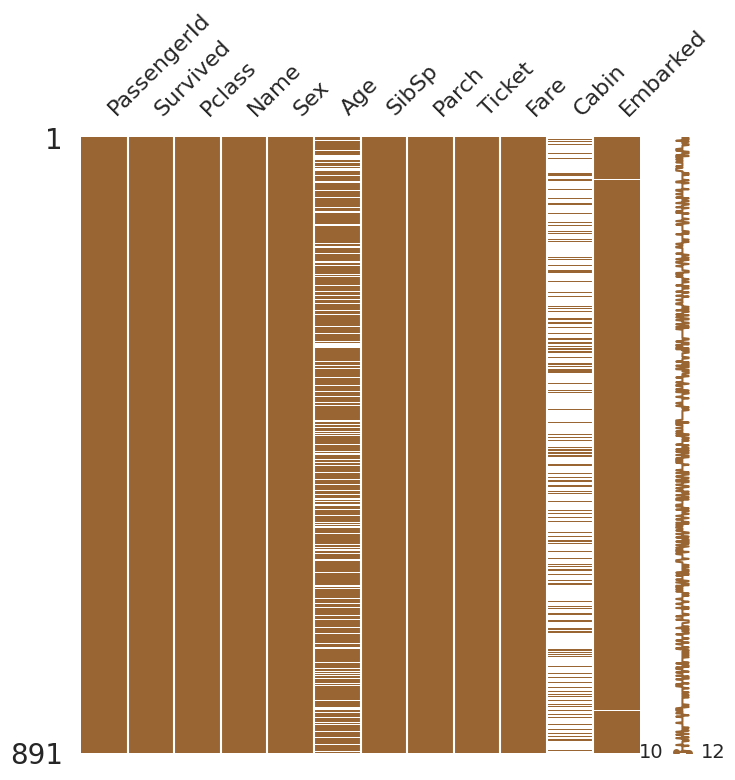

In [11]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.6, 0.4, 0.2))

<Axes: >

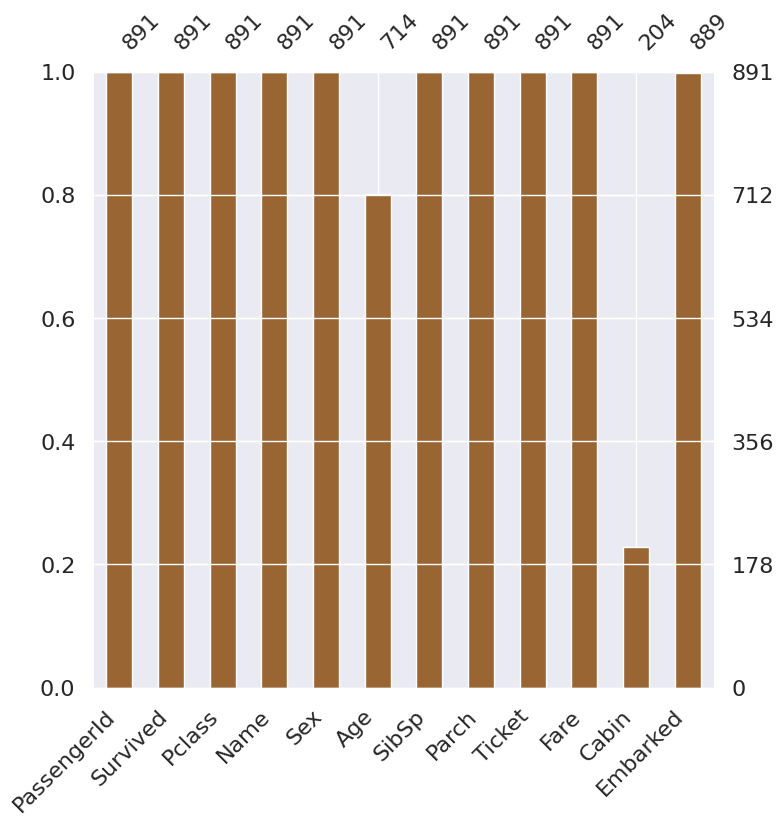

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.6, 0.4, 0.2))

<Axes: >

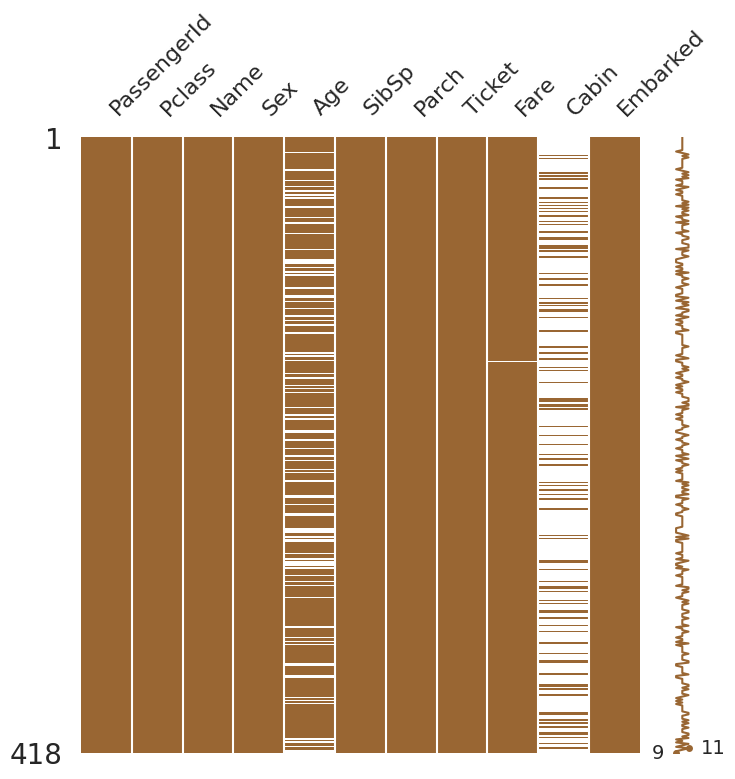

In [13]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.6, 0.4, 0.2))

<Axes: >

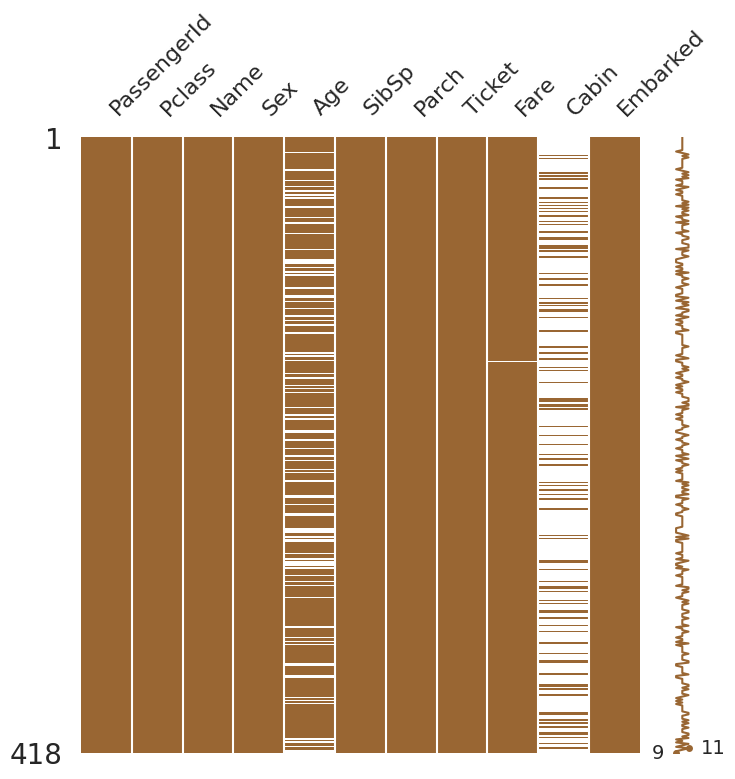

In [14]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.6, 0.4, 0.2))

#### 2.2 Target Label 확인

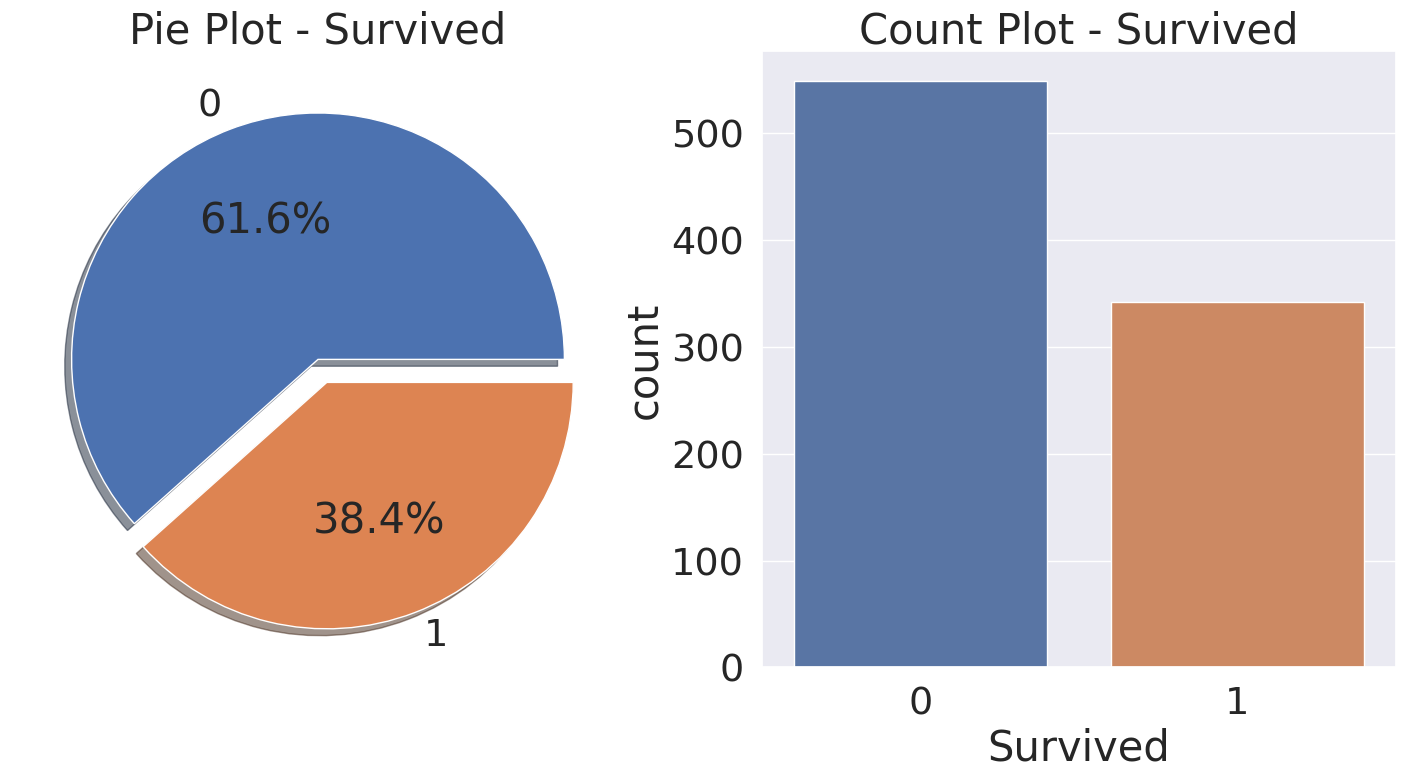

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],autopct="%1.1f%%", ax=ax[0], shadow=True)

ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

#### 3. Exploratory Data Analysis


In [16]:
# Pclass별 몇 명이 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
# Pclass별 생존자가 몇 명 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

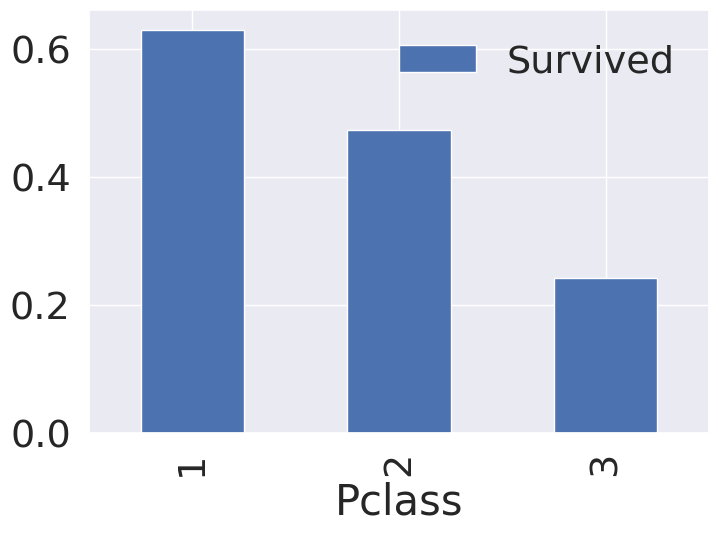

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

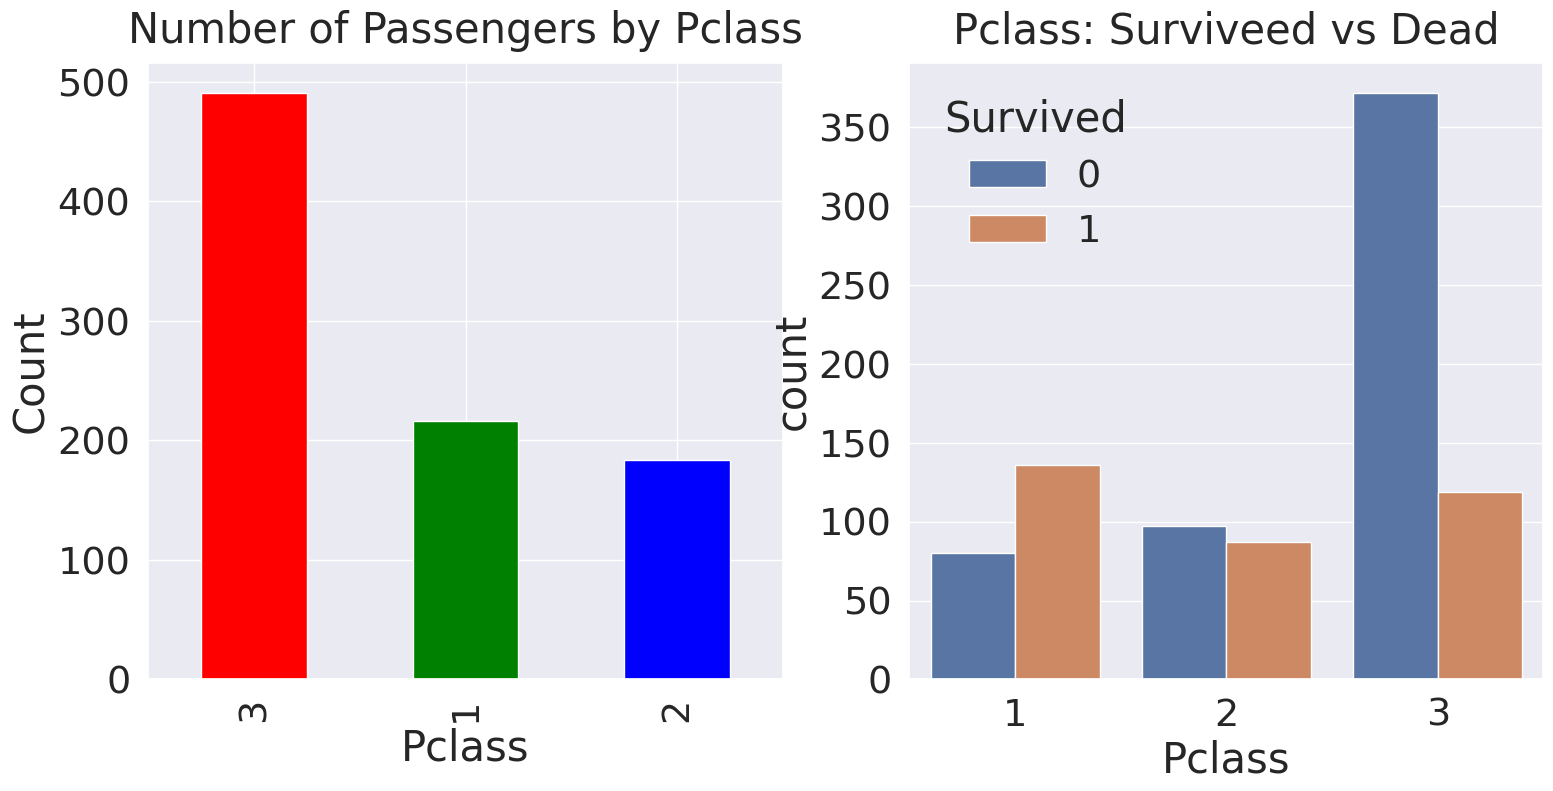

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['red', 'green', 'blue'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=1.02)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Surviveed vs Dead', y=1.02)

plt.show()

#### 3.2 Sex

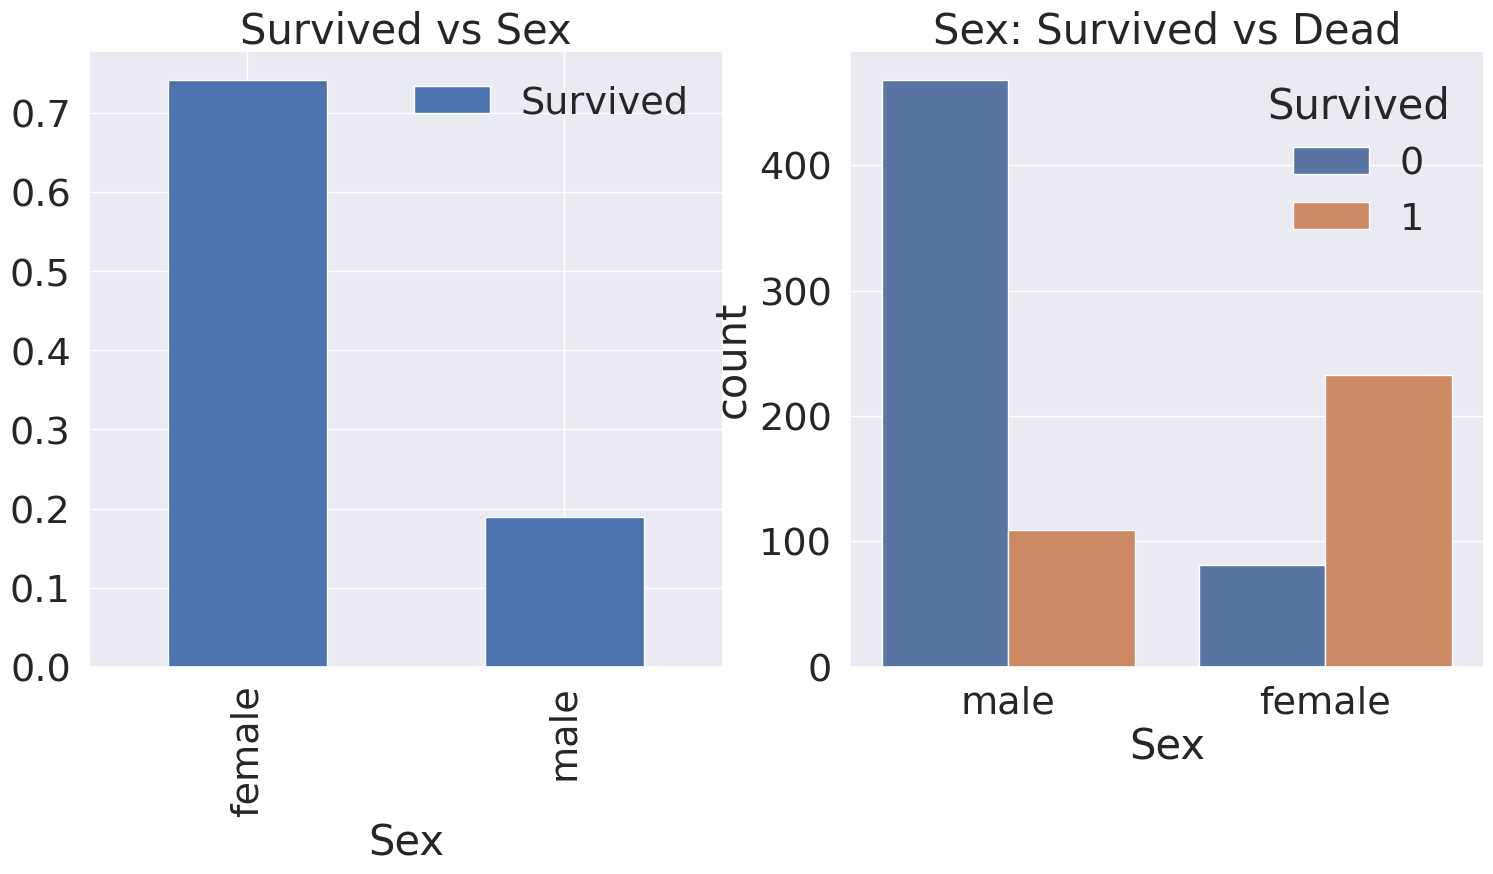

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [25]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 3.3 Both Sex and Pclass

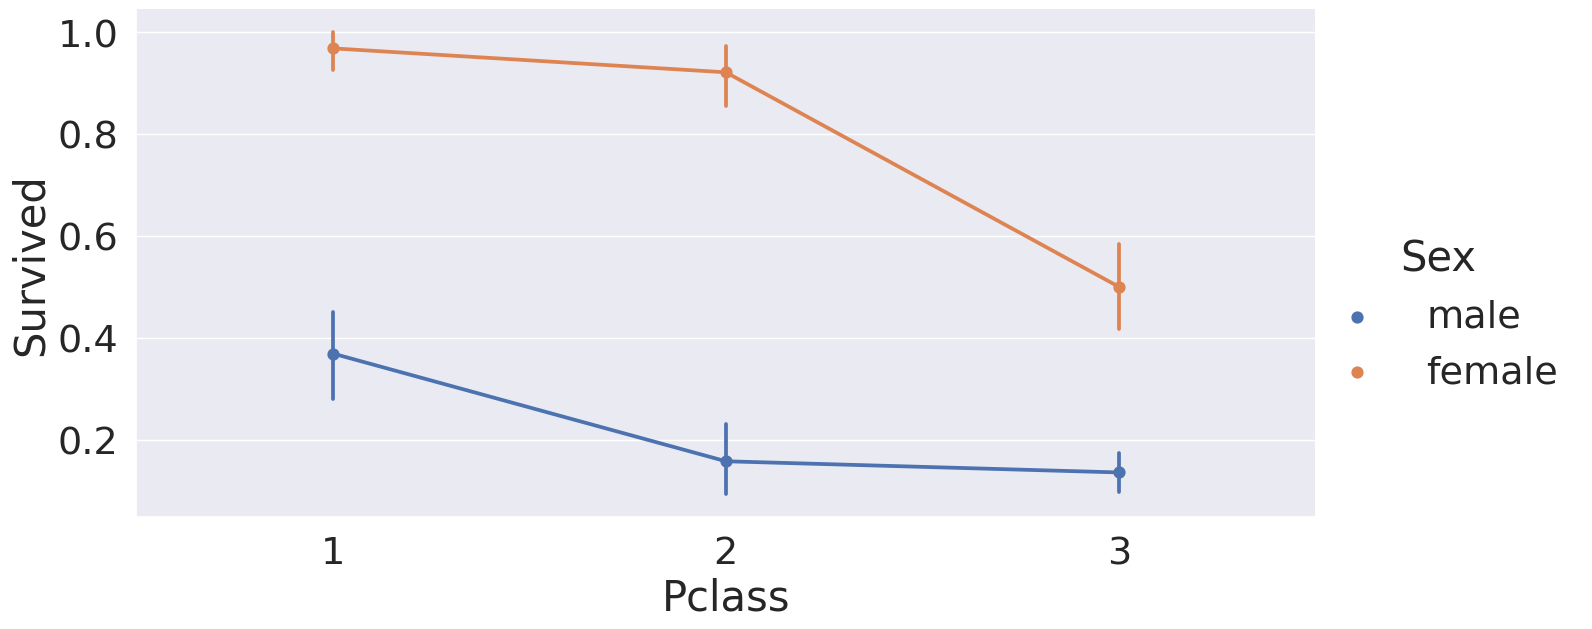

In [27]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=7, aspect=2)

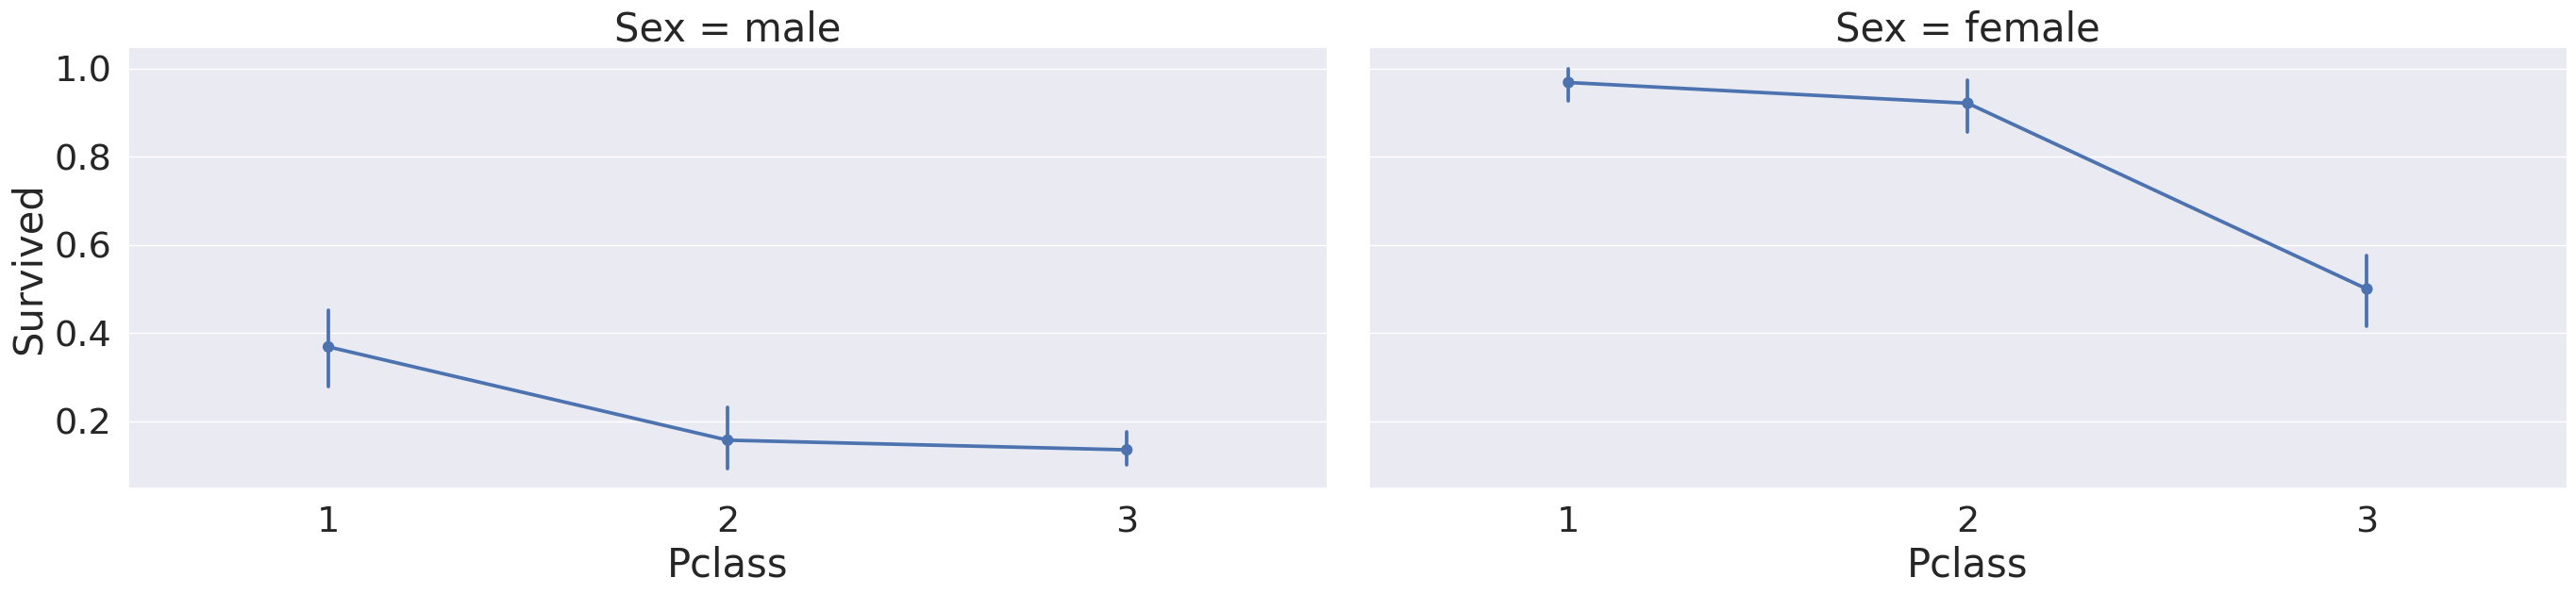

In [28]:
sns.catplot(x='Pclass', y='Survived', col='Sex', data=df_train, kind='point', height=7, aspect=2)

#### 3.4 Age

In [29]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max():.1f}")
print(f"제일 어린 탑승객: {df_train['Age'].min():.1f}")
print(f"탑승객 평균 나이: {df_train['Age'].mean():.1f}")

제일 나이 많은 탑승객: 80.0
제일 어린 탑승객: 0.4
탑승객 평균 나이: 29.7


In [30]:
print(f"제일 나이 많은 탑승객: {df_test['Age'].max():.1f}")
print(f"제일 어린 탑승객: {df_test['Age'].min():.1f}")
print(f"탑승객 평균 나이: {df_test['Age'].mean():.1f}")

제일 나이 많은 탑승객: 76.0
제일 어린 탑승객: 0.2
탑승객 평균 나이: 30.3


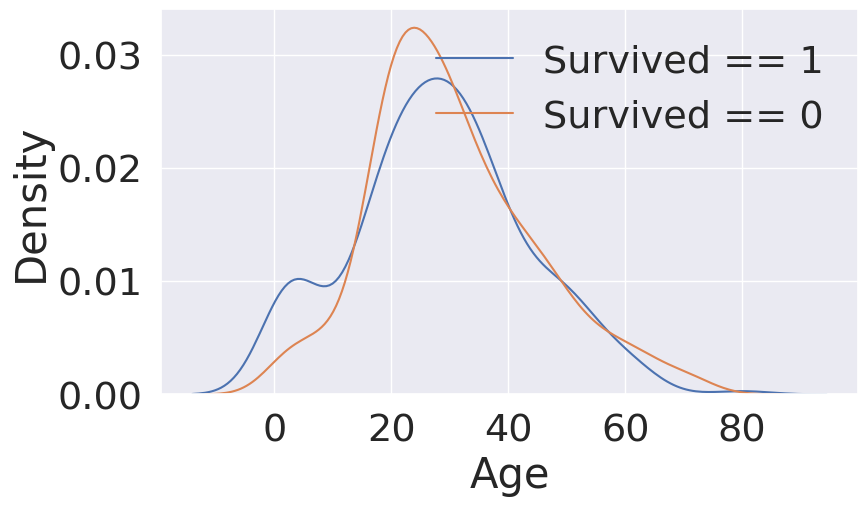

In [31]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

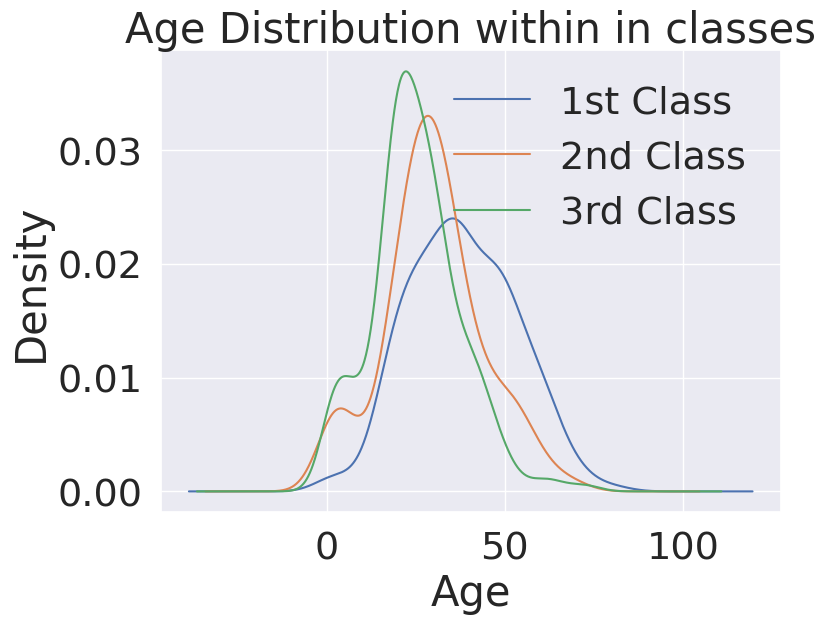

In [32]:
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within in classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

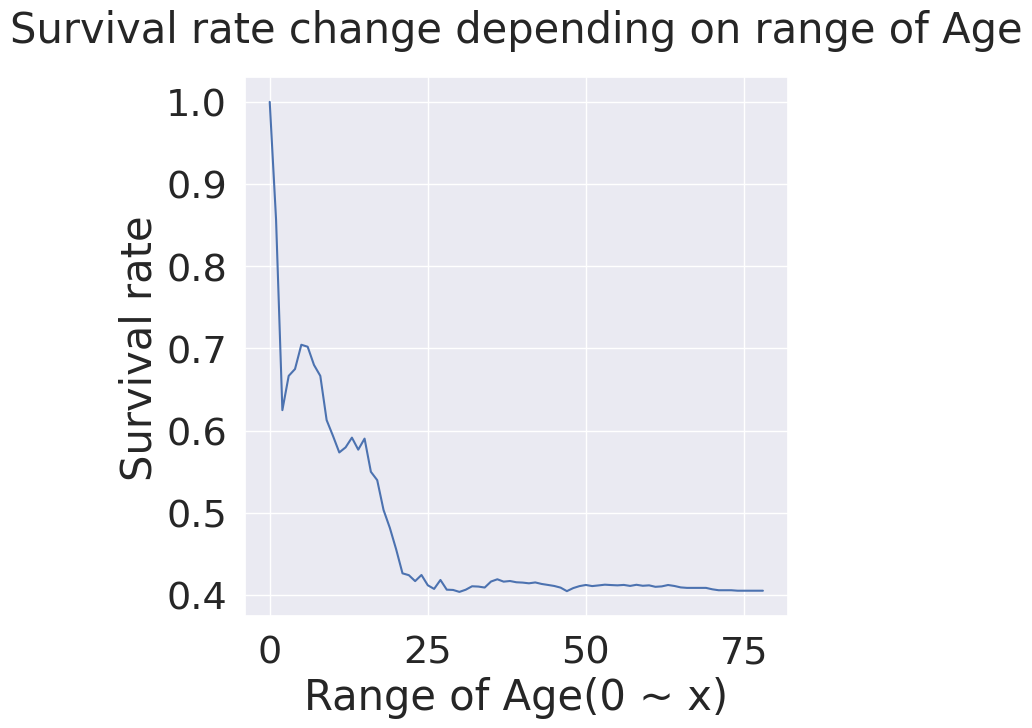

In [33]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.05)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

#### 3.5 Pclass, Sex, Age
- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고 싶습니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다.

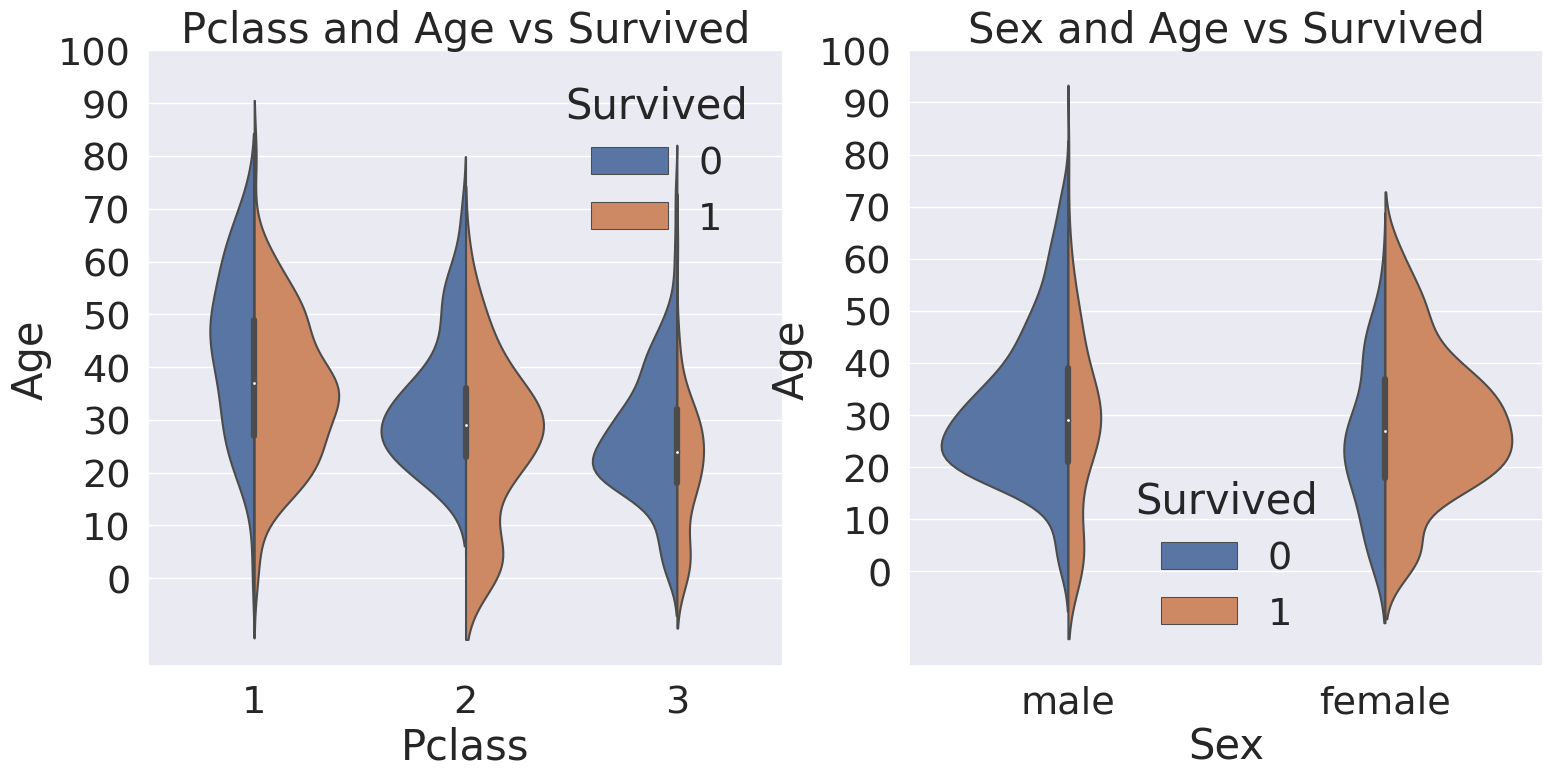

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True, scale='count', ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

#### 3.6 Embarked


<Axes: xlabel='Embarked'>

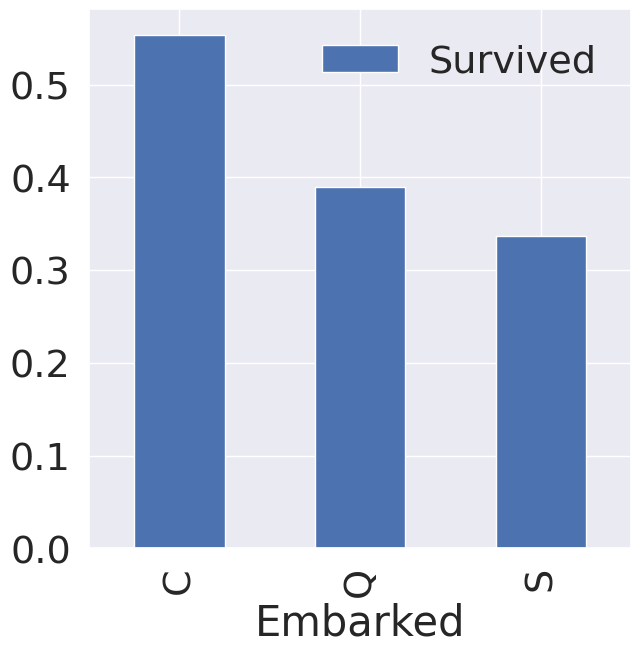

In [37]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

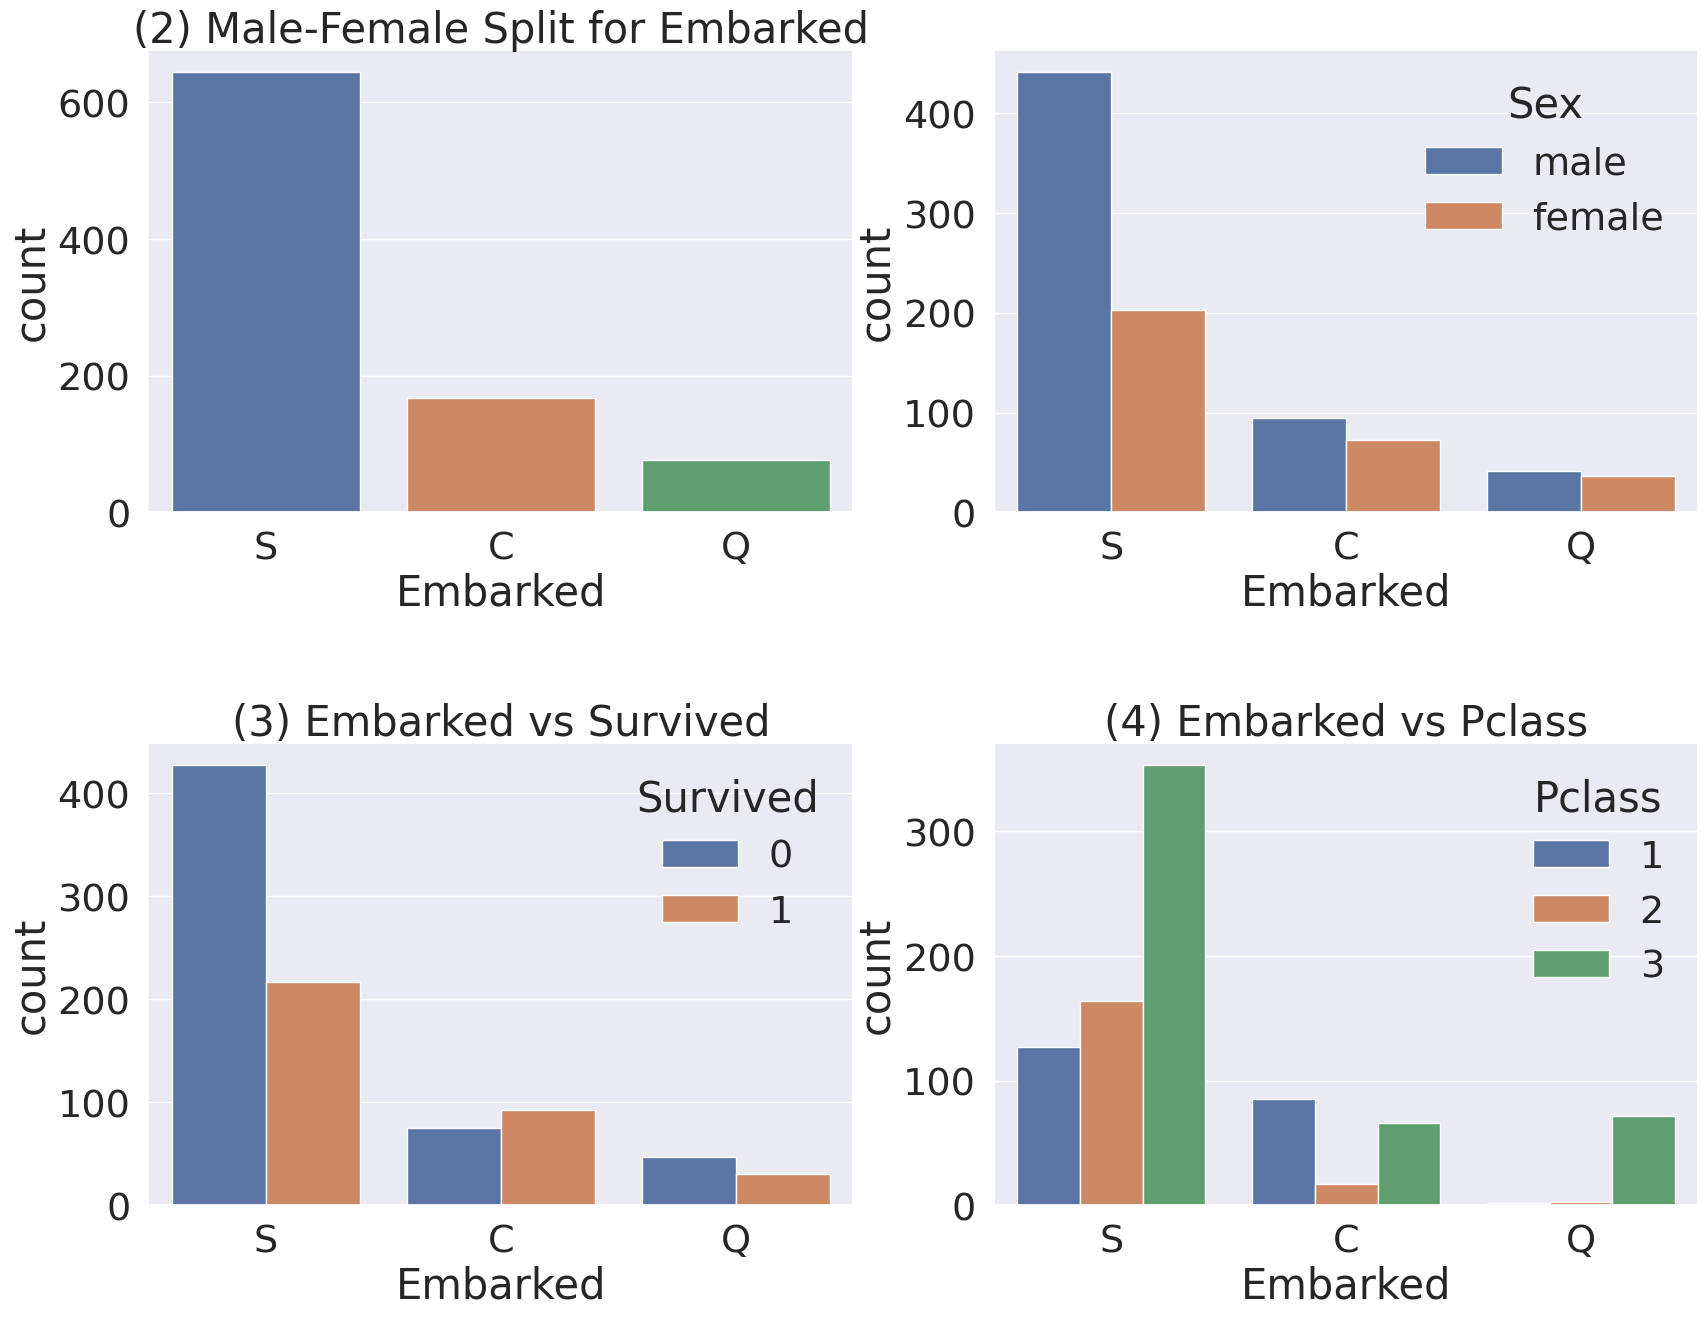

In [39]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 0].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 3.7 Family - Sibsp(형제 자매) + Parch(부모, 자녀)

In [40]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1

In [45]:
print(f"Maximum size of Family: {df_train['Family'].max()}")
print(f"Minimum size of Family:{df_train['Family'].min()}")

Maximum size of Family: 11
Minimum size of Family:1


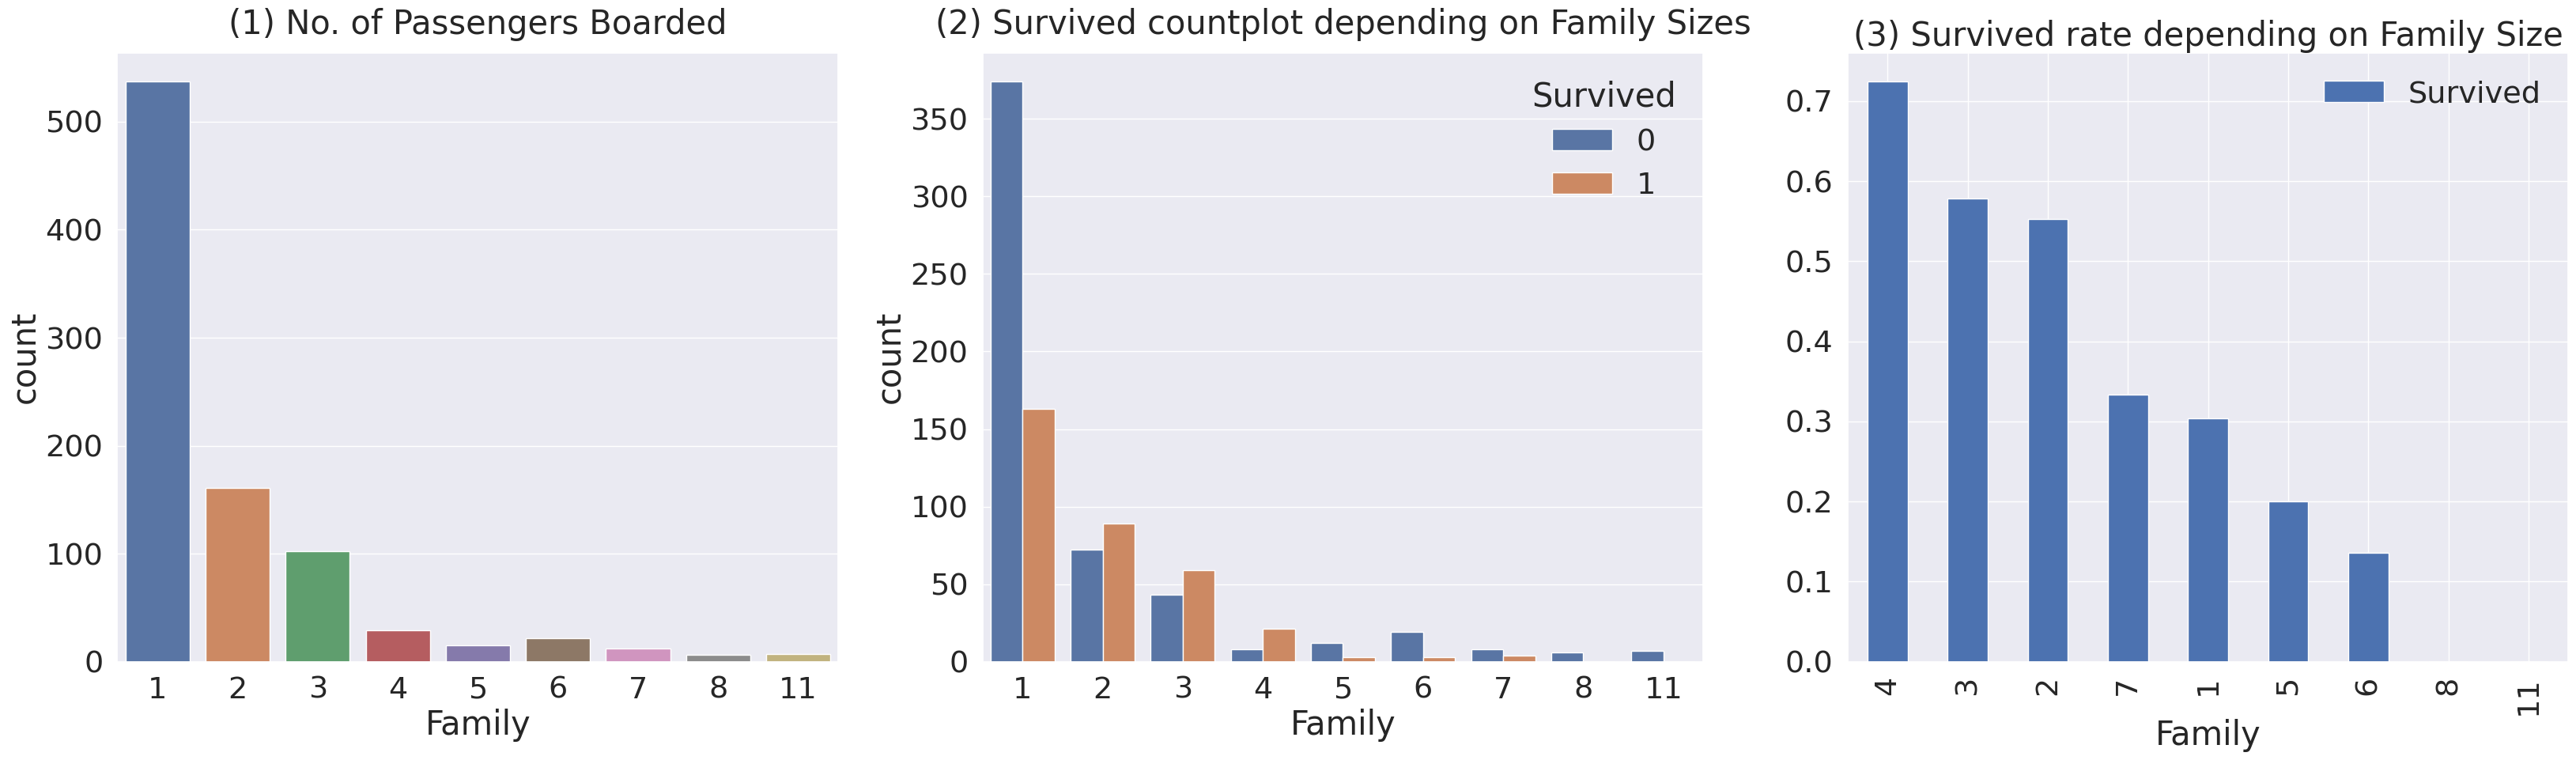

In [47]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='Family', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot(x='Family', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Family Sizes', y=1.02)

df_train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 3.8 Fare

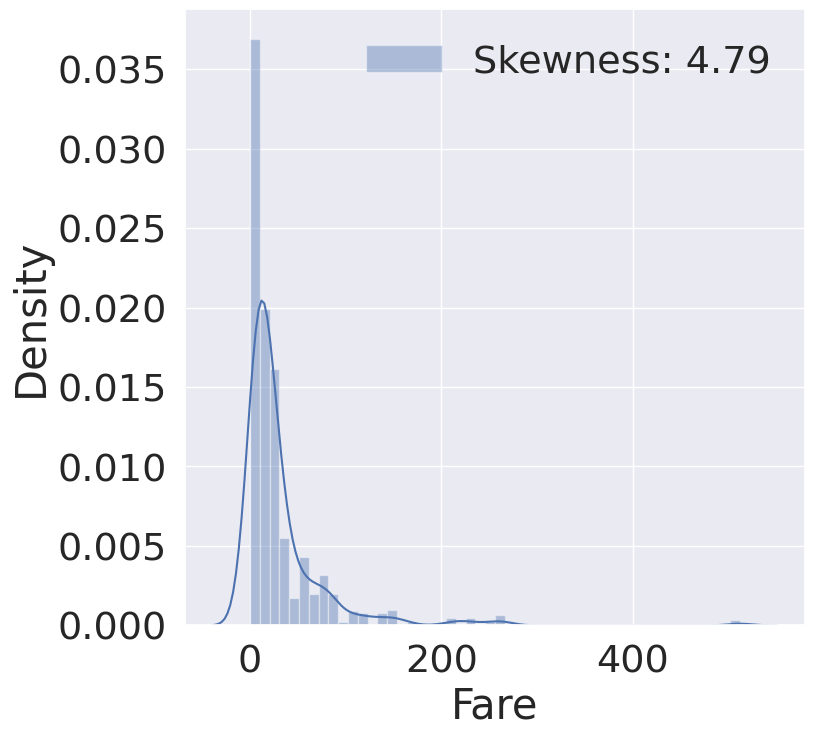

In [49]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

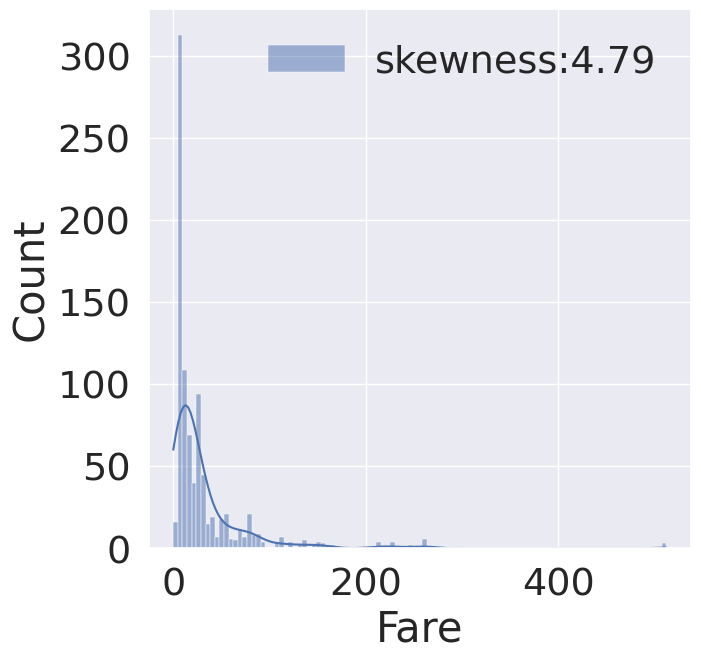

In [51]:
f, ax = plt.subplots(1,1, figsize=(7, 7))
g = sns.histplot(df_train['Fare'], color='b', kde=True, label='skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [52]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

In [53]:
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

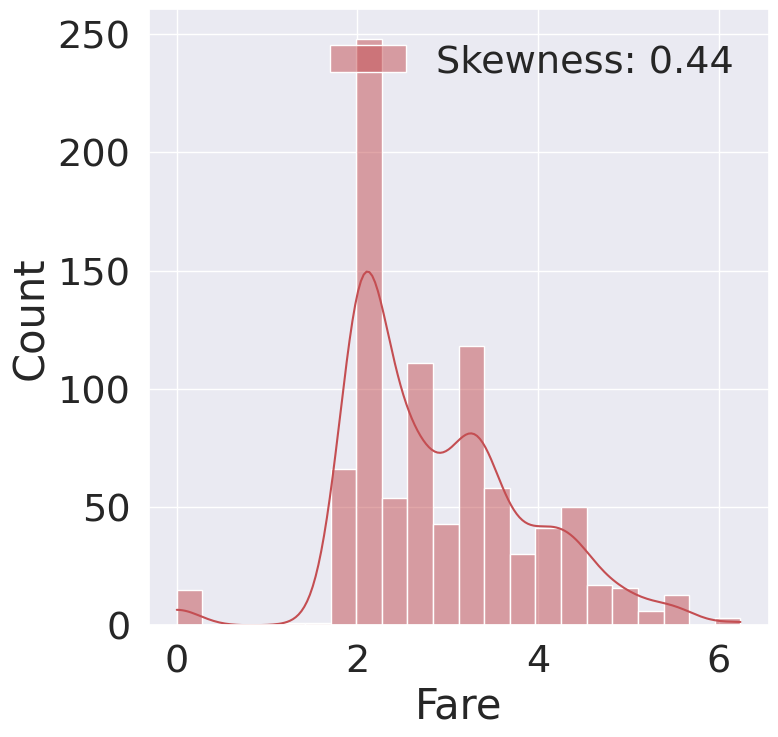

In [54]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.histplot(df_train['Fare'], kde=True, color='r', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 3.9 Cabin

In [55]:
df_train['Cabin'].isnull().sum() / len(df_train['Cabin'])

0.7710437710437711